# Homework1:Image Classification

檔名請按照命名格式:711xxxxxxx(您的學號)_hw1.ipynb

In [1]:
from tensorflow.keras.datasets import  mnist

(x_train, y_train), (x_test, y_test)  = mnist.load_data() # 回傳兩個tuple

CLASS_NAME = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

1.導入MNIST資料集並視覺化5個樣本和對應的Label（10分）

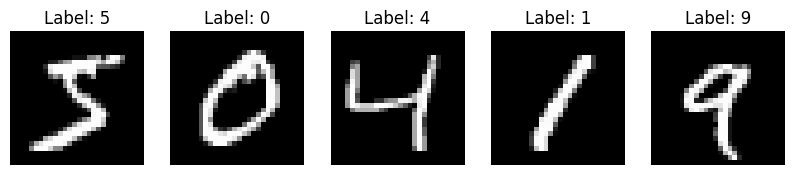

In [2]:
import numpy as np
from matplotlib import pyplot as plt

# 取出前5個樣本
samples, labels = [], []
for i in range(5):
    image = x_train[i]
    label = y_train[i]
    samples.append(image.squeeze())  # squeeze 去掉 channel 維度
    labels.append(label)

# 視覺化 5 個樣本及其對應的 Label
fig, axs = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axs[i].imshow(samples[i], cmap='gray')
    axs[i].set_title(f"Label: {labels[i]}")
    axs[i].axis('off')

plt.show()

2.資料預處理並把資料劃分成訓練集和測試集（10分）

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

將數據轉成一維且進行標準化:

In [4]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_val = x_val.reshape(x_val.shape[0], -1)

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')

x_train /= 255
x_val /= 255


將Label進行one-hot編碼:

In [5]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)


印出訓練集與測試集的shape:

In [6]:
print(f"訓練集的shape: {x_train.shape}")
print(f"測試集的shape: {x_val.shape}")

訓練集的shape: (48000, 784)
測試集的shape: (12000, 784)


In [7]:
print(f"訓練集的shape: {y_train.shape}")
print(f"測試集的shape: {y_val.shape}")

訓練集的shape: (48000, 10)
測試集的shape: (12000, 10)


3.構建至少兩層隱藏層的ANN（10分）

建立神經網絡:

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.losses import CategoricalCrossentropy

input_shape = (784,)
num_classes = 10
# Linear model
model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


印出模型的架構:

In [9]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

None


4.完成訓練參數設置和訓練模型(10分）

設置optimizer、loss function、metrics、learning rate(若您選擇的optimizer有預設的learning rate則可以不用):

In [10]:
model.compile(optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'])

訓練模型:

In [11]:
batch_size = 128
epochs = 10

# 儲存訓練過程
history = model.fit(x_train,
            y_train,
            batch_size = batch_size,
            epochs = epochs,
            verbose = 1,
            validation_data = (x_val, y_val))

# 使用 evalute() 來評估模型
score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8503 - loss: 0.5437 - val_accuracy: 0.9565 - val_loss: 0.1487
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9628 - loss: 0.1253 - val_accuracy: 0.9688 - val_loss: 0.1070
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9753 - loss: 0.0812 - val_accuracy: 0.9733 - val_loss: 0.0912
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9843 - loss: 0.0542 - val_accuracy: 0.9746 - val_loss: 0.0819
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9892 - loss: 0.0362 - val_accuracy: 0.9729 - val_loss: 0.0855
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9917 - loss: 0.0285 - val_accuracy: 0.9762 - val_loss: 0.0789
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9934 - loss: 0.0223 - val_accuracy: 0.9759 - val_loss: 0.0852
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9948 - loss: 0.0181 - val_accuracy

5.訓練模型並視覺化訓練曲線證明Loss隨著訓練的逐漸下降（20分）

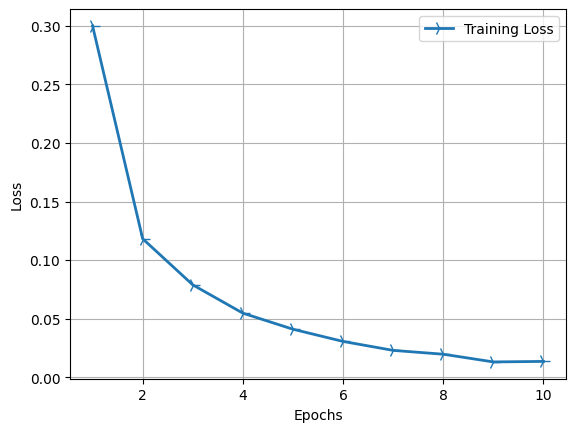

In [15]:
# 獲取訓練記錄
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# 準備圖表中的x軸
epochs = range(1, len(loss_values) + 1)

# 製作loss圖表
# line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
# plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

6.印出模型在測試集上的表現,accuracy需達到90%以上（20分）

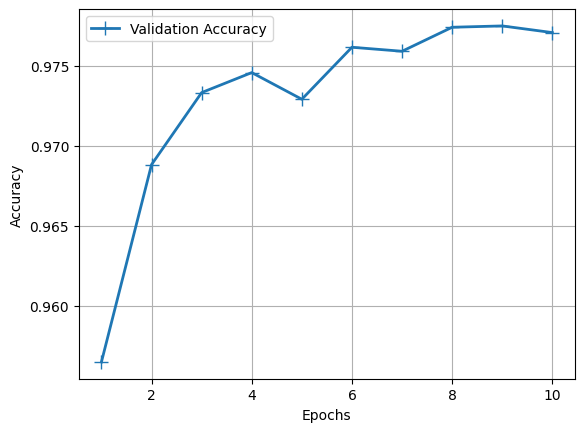

In [14]:
# 製作accuracy圖表
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation Accuracy')
# line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
# plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

7.顯示出模型預測測試集的Confusion Matrix、Precision、Recall、Accuracy（10分）

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Precision: 0.9772462251409123
Recall: 0.9770833333333333
Accuracy: 0.9770833333333333


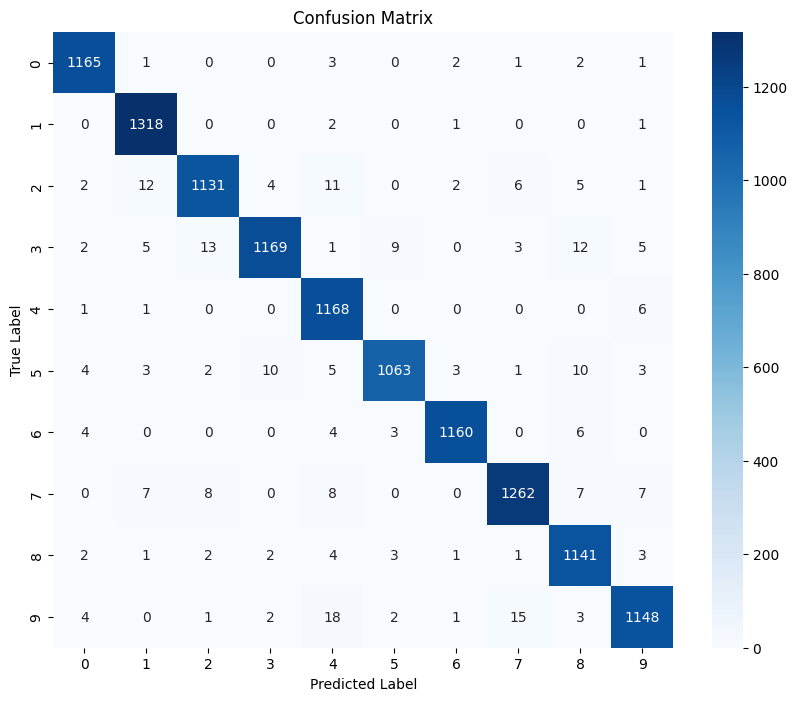

In [18]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
import seaborn as sns

# 1. 使用模型進行預測
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # 將 one-hot 編碼轉換為類別
y_true = np.argmax(y_val, axis=1)  # 測試集的真實標籤

# 2. 計算混淆矩陣
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# 3. 計算 Precision, Recall, 和 Accuracy
precision = precision_score(y_true, y_pred_classes, average='weighted')  # 加權平均
recall = recall_score(y_true, y_pred_classes, average='weighted')  # 加權平均
accuracy = accuracy_score(y_true, y_pred_classes)

# 4. 打印結果
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")

# 5. 繪製混淆矩陣
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

8.視覺化3個模型預測錯誤的資料（10分）

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Number of incorrect predictions: 275


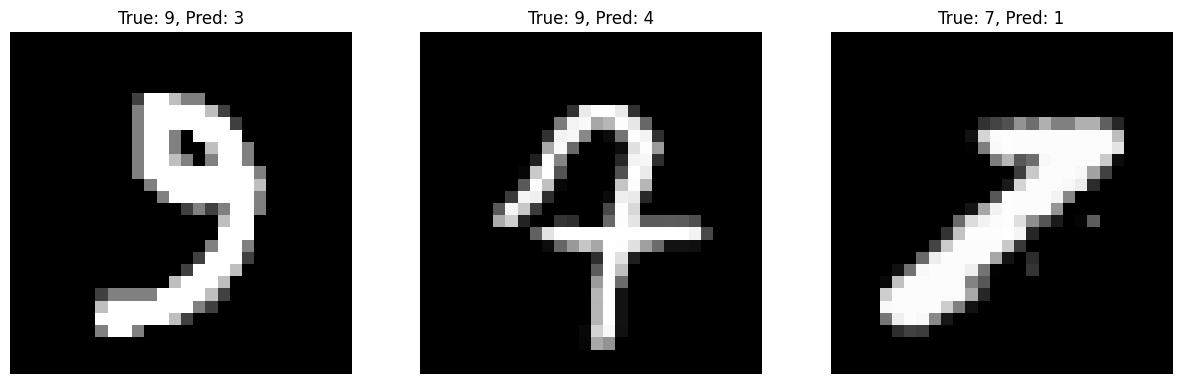

In [21]:
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # 預測結果的類別標籤
y_true = np.argmax(y_val, axis=1)  # 測試集的真實類別標籤

# 2. 找出預測錯誤的樣本
incorrect_indices = np.where(y_pred_classes != y_true)[0]  # 找到預測錯誤的索引
print(f"Number of incorrect predictions: {len(incorrect_indices)}")

# 3. 隨機選擇3個預測錯誤的樣本進行可視化
num_samples = 3
incorrect_samples = np.random.choice(incorrect_indices, num_samples, replace=False)

# 4. 可視化這3個預測錯誤的樣本
fig, axs = plt.subplots(1, num_samples, figsize=(15, 5))

for i, idx in enumerate(incorrect_samples):
    image = x_val[idx].squeeze()  # 去掉通道維度
    true_label = y_true[idx]
    predicted_label = y_pred_classes[idx]

    image = image.reshape(28, 28)

    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(f"True: {true_label}, Pred: {predicted_label}")
    axs[i].axis('off')

plt.show()